# Analytical decomposition of the Integrated Wiener Process

Hopefully we can retrieve the AFRAID Transform.

In [2]:
import numpy as np
from matplotlib import pyplot as plt 

traj_length = 270

In [3]:
def dote(n,m):
    if n==m:
        return 1.5 - 2*((-1)**n)/(np.pi*(n+0.5))
    else:
        return 1-(((-1)**n)/((n+0.5)*np.pi) + ((-1)**m)/((m+0.5)*np.pi))

Verifying the covariance kernel:

In [4]:
def unit_func(n):
    t = np.arange(traj_length)/(traj_length-1)
    return (np.cos((n+0.5)*np.pi*t)-1)

(0.0, 269.0, 0.0, 269.0)

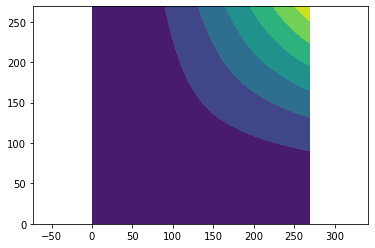

In [5]:
CN = np.zeros((traj_length, traj_length))

for i in range(CN.shape[0]):
    for j in range(CN.shape[1]):
        for k in range(20):
            CN[i,j] += 2/((np.pi * (k+0.5))**4) * unit_func(k)[i] *  unit_func(k)[j]

plt.contourf(CN)
plt.axis('equal')

c:\Users\nxf67027\Anaconda3\envs\liberty\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


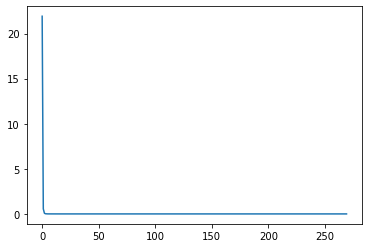

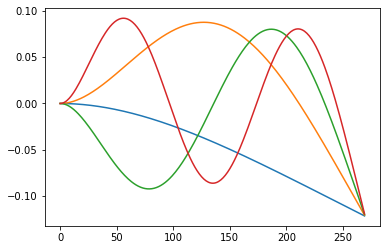

In [6]:
eigvaltrue, eigvectrue = np.linalg.eig(CN)
plt.figure()
plt.plot(eigvaltrue)
plt.figure()
for i in range(4):
    plt.plot(np.real(eigvectrue[:,i]))

/Users/thinhhoang/miniforge3/envs/liberty/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


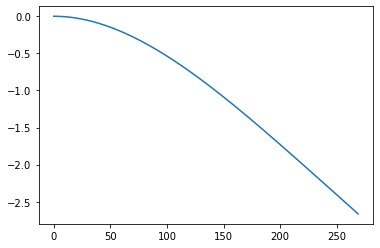

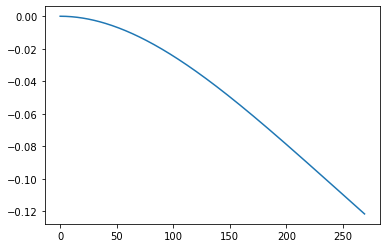

In [6]:
plt.plot(np.real(CN @ eigvectrue[:,0]))
plt.figure()
plt.plot(eigvectrue[:,0])

Hence the covariance kernel seems correct!

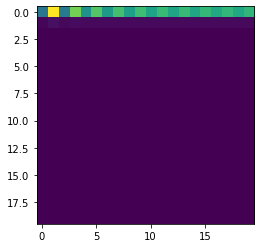

In [7]:
# The integration operator

A = np.zeros((traj_length,traj_length))
for i in range(A.shape[0]):
    for k in range(A.shape[1]):
        A[i,k] = dote(i,k)

D = np.diag(2/(np.pi * (np.arange(traj_length) + 0.5))**4)
Ap = D@A
plt.imshow(Ap[:20,:20])

In [8]:
eigval, eigvec = np.linalg.eig(Ap)

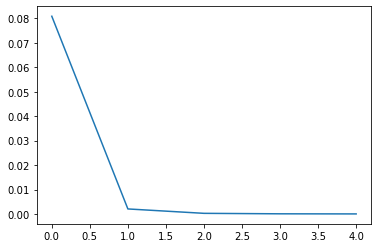

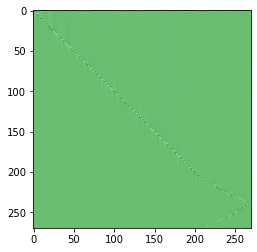

In [9]:
plt.plot(eigval[:5])
plt.figure()
plt.imshow(eigvec, cmap='Greens')

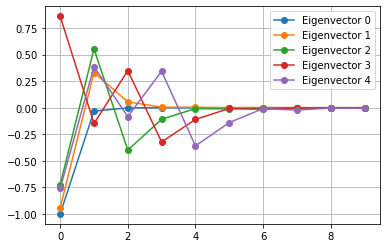

In [10]:
for i in range(5):
    plt.plot(eigvec[:10,i], '-o', label='Eigenvector ' + str(i))
plt.legend()
plt.grid()

In [11]:
B = np.zeros((traj_length,traj_length))
for i in range(B.shape[1]):
    B[:,i] = unit_func(i)

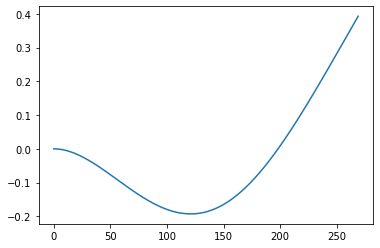

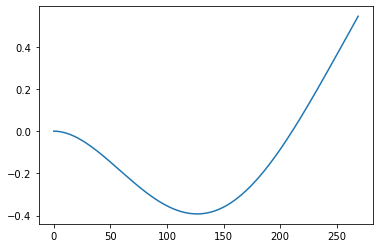

In [12]:
plt.plot(CN @ B @ eigvec[:,1])
plt.figure()
plt.plot(B @ eigvec[:,1])

In [18]:
afraid_transform = B @ eigvec
afraid_transform = afraid_transform / np.linalg.norm(afraid_transform, axis=0)
import pickle 
with open('afraid_'+str(traj_length)+'.basis', 'wb') as f:
    pickle.dump(afraid_transform, f)
print('AFRAID Transform of length {:d} has been generated successfully!'.format(traj_length))

AFRAID Transform of length 270 has been generated successfully!
